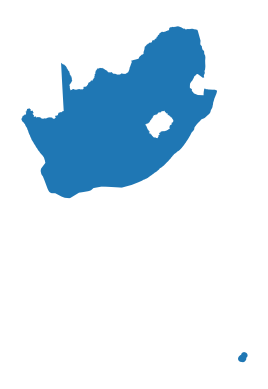

In [3]:
import osmnx as ox

city = ox.geocode_to_gdf('South Africa')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

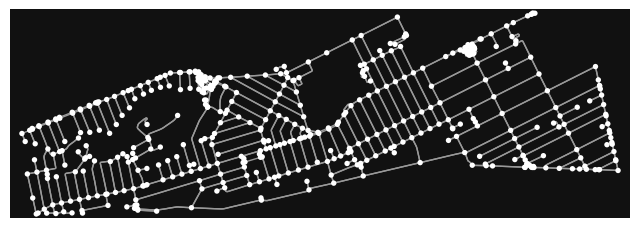

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [28]:
kensington_graph = ox.graph_from_place('Kensington, City of Johannesburg, South Africa')
ox.plot_graph(kensington_graph)

In [29]:
kensington_gdf = ox.graph_to_gdfs(kensington_graph, nodes=False)
kensington_gdf.head()

osmid lanes  ref  \
u        v          key                                      
26417799 305730224  0                  87361206     4  R24   
         288933063  0                  87361206     4  R24   
         288933328  0                  26372461     2  NaN   
26417800 7151979247 0                  23060545     2  NaN   
         7164510312 0    [765781197, 767333415]     2  R24   

                                          name      highway maxspeed  oneway  \
u        v          key                                                        
26417799 305730224  0    Albertina Sisulu Road      primary       60   False   
         288933063  0    Albertina Sisulu Road      primary       60   False   
         288933328  0             Cavan Street  residential      NaN   False   
26417800 7151979247 0               1st Street  residential      NaN   False   
         7164510312 0    Albertina Sisulu Road      primary       60    True   

                        reversed  length  \
u        v          key                    
26417799 305730224  0      False  45.163   
         288933063  0       True  40.507   
         288933328  0       True  88.156   
26417800 7151979247 0      False   7.771   
         7164510312 0      False  31.393   

                                                                  geometry  \
u        v          key                                                      
26417799 305730224  0    LINESTRING (28.08472 -26.19144, 28.08513 -26.1...   
         288933063  0    LINESTRING (28.08472 -26.19144, 28.08434 -26.1...   
         288933328  0    LINESTRING (28.08472 -26.19144, 28.08491 -26.1...   
26417800 7151979247 0    LINESTRING (28.07650 -26.19444, 28.07647 -26.1...   
         7164510312 0    LINESTRING (28.07650 -26.19444, 28.07638 -26.1...   

                        service access  
u        v          key                 
26417799 305730224  0       NaN    NaN  
         288933063  0       NaN    NaN  
         288933328  0       NaN    NaN  
26417800 7151979247 0       NaN    NaN  
         7164510312 0       NaN    NaN

In [38]:
# Filter out NaN names
named_roads_kensington_gdf = kensington_gdf[kensington_gdf.name.notna()]
named_roads_kensington_gdf

osmid lanes  ref  \
u           v          key                                      
26417799    305730224  0                  87361206     4  R24   
            288933063  0                  87361206     4  R24   
            288933328  0                  26372461     2  NaN   
26417800    7151979247 0                  23060545     2  NaN   
            7164510312 0    [765781197, 767333415]     2  R24   
...                                            ...   ...  ...   
9787389627  687898150  0                  34035782     2  NaN   
            448293643  0                  34035782     2  NaN   
10775271954 288929178  0                1120014745     2  NaN   
10956601310 390371867  0                  34036038     2  NaN   
            390036534  0                  34036038     2  NaN   

                                             name       highway maxspeed  \
u           v          key                                                 
26417799    305730224  0    Albertina Sisulu Road       primary       60   
            288933063  0    Albertina Sisulu Road       primary       60   
            288933328  0             Cavan Street   residential      NaN   
26417800    7151979247 0               1st Street   residential      NaN   
            7164510312 0    Albertina Sisulu Road       primary       60   
...                                           ...           ...      ...   
9787389627  687898150  0            Protea Street   residential      NaN   
            448293643  0            Protea Street   residential      NaN   
10775271954 288929178  0          Montague Street  unclassified      NaN   
10956601310 390371867  0              Ernest Road   residential      NaN   
            390036534  0              Ernest Road   residential      NaN   

                            oneway reversed  length  \
u           v          key                            
26417799    305730224  0     False    False  45.163   
            288933063  0     False     True  40.507   
            288933328  0     False     True  88.156   
26417800    7151979247 0     False    False   7.771   
            7164510312 0      True    False  31.393   
...                            ...      ...     ...   
9787389627  687898150  0     False    False   5.840   
            448293643  0     False     True  72.536   
10775271954 288929178  0     False    False  52.397   
10956601310 390371867  0     False     True  54.698   
            390036534  0     False    False  56.042   

                                                                     geometry  \
u           v          key                                                      
26417799    305730224  0    LINESTRING (28.08472 -26.19144, 28.08513 -26.1...   
            288933063  0    LINESTRING (28.08472 -26.19144, 28.08434 -26.1...   
            288933328  0    LINESTRING (28.08472 -26.19144, 28.08491 -26.1...   
26417800    7151979247 0    LINESTRING (28.07650 -26.19444, 28.07647 -26.1...   
            7164510312 0    LINESTRING (28.07650 -26.19444, 28.07638 -26.1...   
...                                                                       ...   
9787389627  687898150  0    LINESTRING (28.10714 -26.19513, 28.10717 -26.1...   
            448293643  0    LINESTRING (28.10714 -26.19513, 28.10682 -26.1...   
10775271954 288929178  0    LINESTRING (28.09402 -26.19081, 28.09404 -26.1...   
10956601310 390371867  0    LINESTRING (28.09791 -26.19727, 28.09842 -26.1...   
            390036534  0    LINESTRING (28.09791 -26.19727, 28.09749 -26.1...   

                           service access  
u           v          key                 
26417799    305730224  0       NaN    NaN  
            288933063  0       NaN    NaN  
            288933328  0       NaN    NaN  
26417800    7151979247 0       NaN    NaN  
            7164510312 0       NaN    NaN  
...                            ...    ...  
9787389627  687898150  0       NaN    NaN  
            448293643  0       NaN    NaN  


In [54]:
# Get list of names alone (unique)
unique_names = named_roads_kensington_gdf.name.explode().unique()
unique_names

array(['Albertina Sisulu Road', 'Cavan Street', '1st Street',
       'Arethusa Street', 'Sovereign Street', 'Oxford Road',
       'Pandora Road', 'Royal Oak Street', 'Gloucester Road',
       'Queen Street', 'Buckingham Road', 'Derby Road',
       'Langermann Drive', 'Phoenix Street', 'Kitchener Avenue',
       'Milner Crescent', 'Lancaster Street', 'Roberts Avenue',
       'Leicester Road', 'Juno Street', 'Good Hope Street', 'Lang Street',
       'Cambrian Street', 'Cressey Street', 'Dasher Street',
       'Durham Street', 'Essex Street', 'Ferret Street', 'Emerald Street',
       'Flora Street', 'Spanker Street', 'Saint George Street',
       'Renown Street', 'Hero Street', 'Norfolk Road', 'Somerset Road',
       'Kennet Street', 'Protea Street', 'Cumberland Road',
       'Montague Street', '5th Street', 'Tyne Street', 'Jupiter Street',
       'Magnet Street', 'Ocean Street', 'Albermarle Street', 'Devon Road',
       'Nottingham Road', 'Westmoreland Road', 'Nile Street',
       'Marat